# PHIStruct: Improving phage-host interaction prediction at low sequence similarity settings using structure-aware protein embeddings

<b>Mark Edward M. Gonzales<sup>1, 2</sup>, Jennifer C. Ureta<sup>1, 2, 3</sup> & Anish M.S. Shrestha<sup>1, 2</sup></b>

<sup>1</sup> Bioinformatics Lab, Advanced Research Institute for Informatics, Computing and Networking, De La Salle University, Manila 1004, Philippines <br>
<sup>2</sup> Department of Software Technology, College of Computer Studies, De La Salle University, Manila 1004, Philippines <br>
<sup>3</sup> Walter and Eliza Hall Institute of Medical Research, Melbourne, Victoria, 3052, Australia

✉️ gonzales.markedward@gmail.com, jennifer.ureta@gmail.com, anish.shrestha@dlsu.edu.ph

<hr>

# 💡 Prerequisites

The prerequisite files (i.e., the results of evaluating the models' performance) &mdash; which are saved in `temp/results` &mdash; are already included when the repository was cloned. <br>

<hr>

# Part I: Preliminaries

Import the necessary libraries and modules.

In [7]:
from collections import OrderedDict
import pickle

import matplotlib.pyplot as plt
import numpy as np

import ConstantsUtil

%load_ext autoreload
%autoreload 2

In [8]:
constants = ConstantsUtil.ConstantsUtil()

<hr>

# Part II: Defining the parameters

#### Change the value of `SIMILARITY` as needed.

`SIMILARITY` refers to the maximum train-versus-test sequence similarity.

In [12]:
SIMILARITY = 40

Declare constant variables for readability of subsequent code.

In [14]:
CLASS = 0
PRECISION = 0
RECALL = 1
F1 = 2

In [15]:
labels = [
    "enterococcus",
    "staphylococcus",
    "klebsiella",
    "acinetobacter",
    "pseudomonas",
    "enterobacter",
    "escherichia",
    "others",
]

labels.sort()


def get_macro_no_others(model, threshold, metric):
    ave = 0
    for idx, label in enumerate(labels):
        if label != "others":
            ave += model_results[models.index(model)][threshold][CLASS][metric][idx]

    return ave / (len(labels) - 1)

<hr>

# Part III: State of the art

In [18]:
models = [
    f"boeckaerts-eskapee-smotetomek-{SIMILARITY}",
    f"phiembed-eskapee-smotetomek-{SIMILARITY}",
    f"badam-eskapee-smotetomek-{SIMILARITY}",
    f"blast-eskapee-smotetomek-{SIMILARITY}",
    f"psiblast-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
]

model_results = []
for model in models:
    with open(f"{constants.TEMP_RESULTS}/{model}.pickle", "rb") as f:
        model_results.append(pickle.load(f))

results_f1 = []
for model in models:
    result = []
    for threshold in range(0, 11):
        metric = get_macro_no_others(model, threshold, F1) * 100
        result.append(metric)
    results_f1.append(result[:-1])

axis = []
for model in models:
    scale = [threshold * 10 for threshold in range(0, 11)]
    axis.append(scale[:-1])

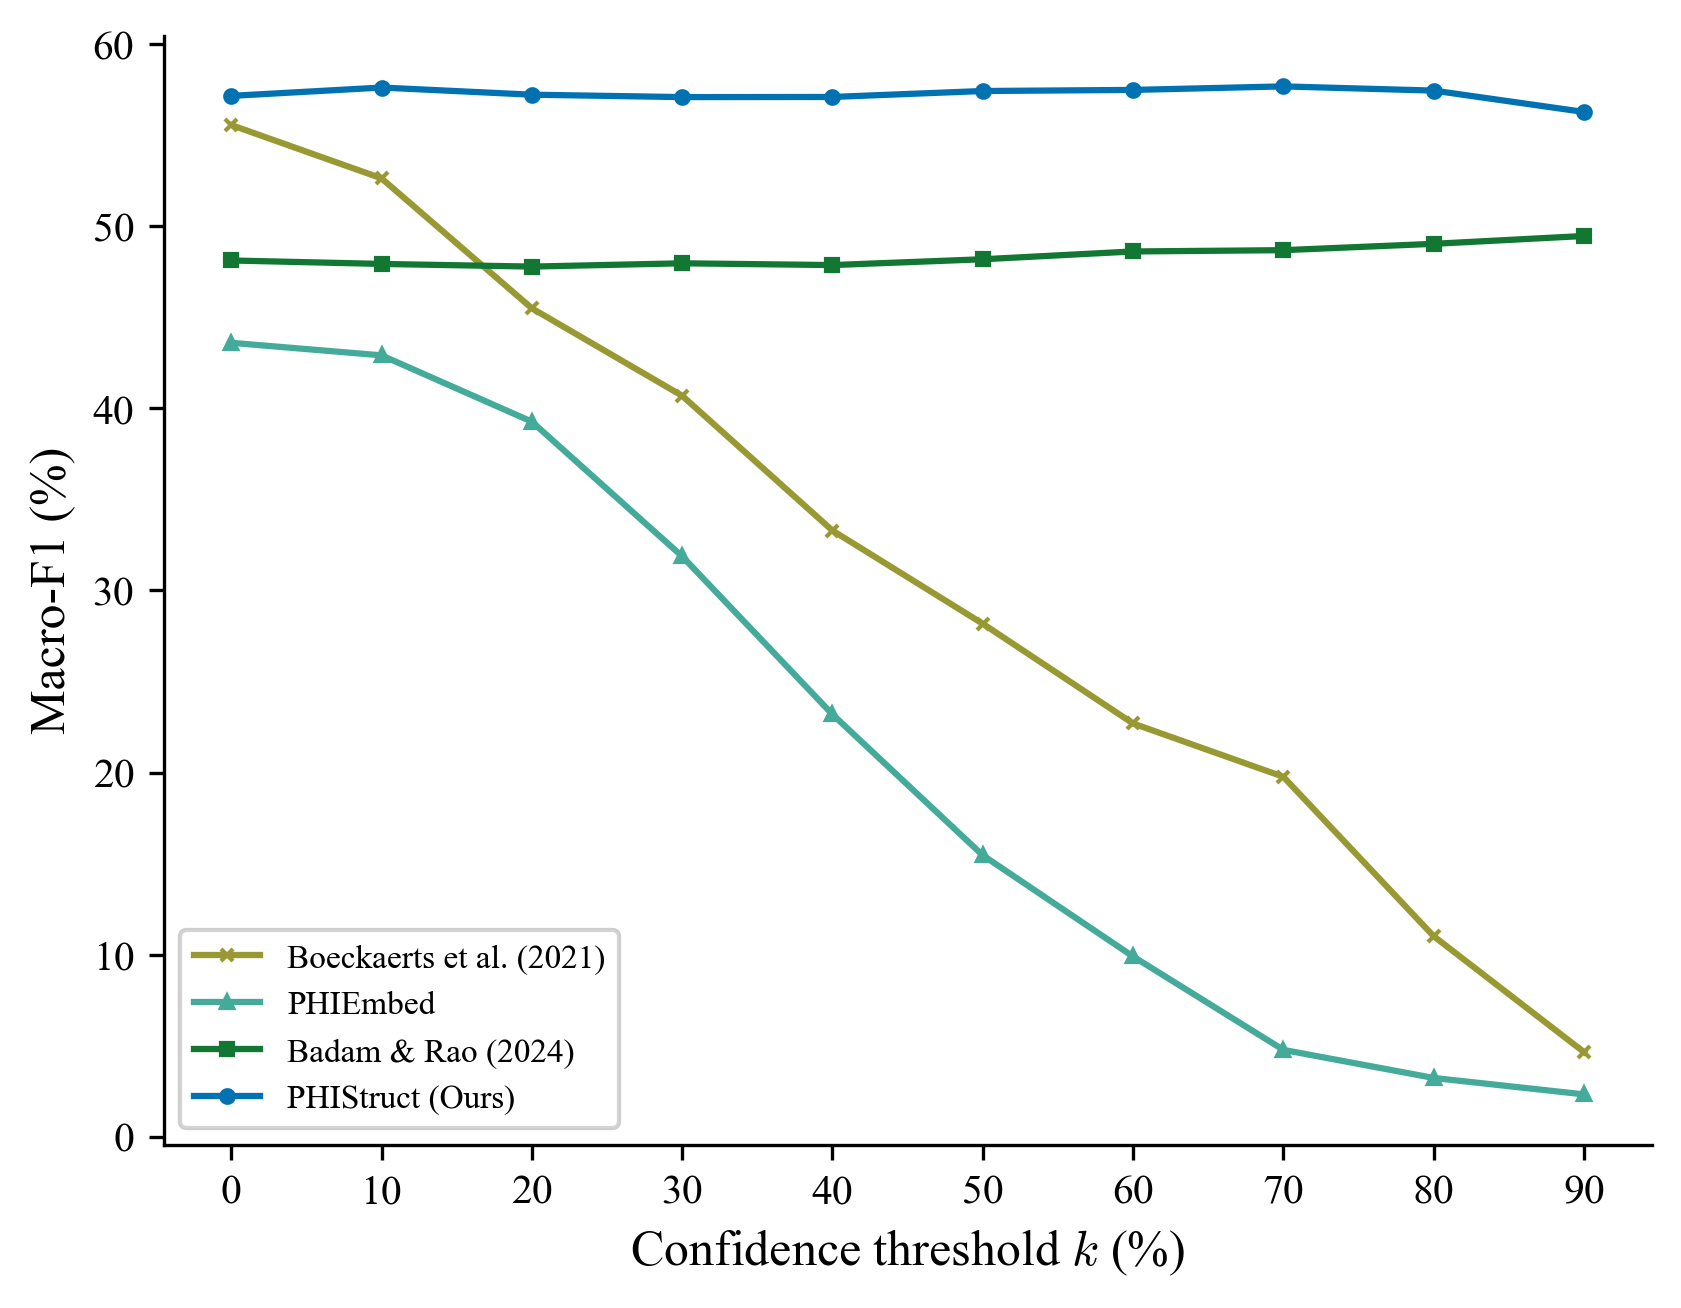

In [19]:
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300

fig, ax = plt.subplots()
colors = [
    "#0072b2",
    "#f781bf",
    "#56b4e9",
    "#117733",
    "#44aa99",
    "#999933",
]
colors.reverse()

markers = ["x", "^", "s", "p", "o"]

(line0,) = ax.plot(
    axis[0],
    results_f1[0],
    color=colors[0],
    label="Boeckaerts et al. (2021)",
    marker=markers[0][0],
    markersize=3,
)

(line1,) = ax.plot(
    axis[1],
    results_f1[1],
    color=colors[1],
    label="PHIEmbed",
    marker=markers[1][0],
    markersize=3,
)

(line2,) = ax.plot(
    axis[2],
    results_f1[2],
    color=colors[2],
    label="Badam & Rao (2024)",
    marker=markers[2][0],
    markersize=3,
)

(line4,) = ax.plot(
    axis[4],
    results_f1[-1],
    color=colors[-1],
    label="PHIStruct (Ours)",
    marker=markers[-1][0],
    markersize=3,
)

if SIMILARITY == 100:
    ax.set_ylim(top=91)
elif SIMILARITY == 80:
    ax.set_ylim(top=71)
elif SIMILARITY == 60:
    ax.set_ylim(top=71)

ax.set_ylabel("Macro-F1 (%)", fontsize=12)
ax.set_xlabel("Confidence threshold $k$ (%)", fontsize=12)
ax.set_xticks([val for val in axis[0]])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
legend1 = ax.legend(
    loc="lower left",
    handles=[line0, line1, line2, line4],
    title_fontsize=8,
    prop={"size": 8},
)

plt.gca().add_artist(legend1)
plt.savefig(f"../figures/sota-f1-s-{SIMILARITY}.png", bbox_inches="tight")

<hr>

# Part IV: Sequence-only protein language models

In [22]:
models = [
    f"prott5-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"esm1b-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"esm2-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"seqvec-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
]

model_results = []
for model in models:
    with open(f"{constants.TEMP_RESULTS}/{model}.pickle", "rb") as f:
        model_results.append(pickle.load(f))

results_f1 = []
for model in models:
    result = []
    for threshold in range(0, 11):
        metric = get_macro_no_others(model, threshold, F1) * 100
        result.append(metric)
    results_f1.append(result[:-1])

axis = []
for model in models:
    scale = [threshold * 10 for threshold in range(0, 11)]
    axis.append(scale[:-1])

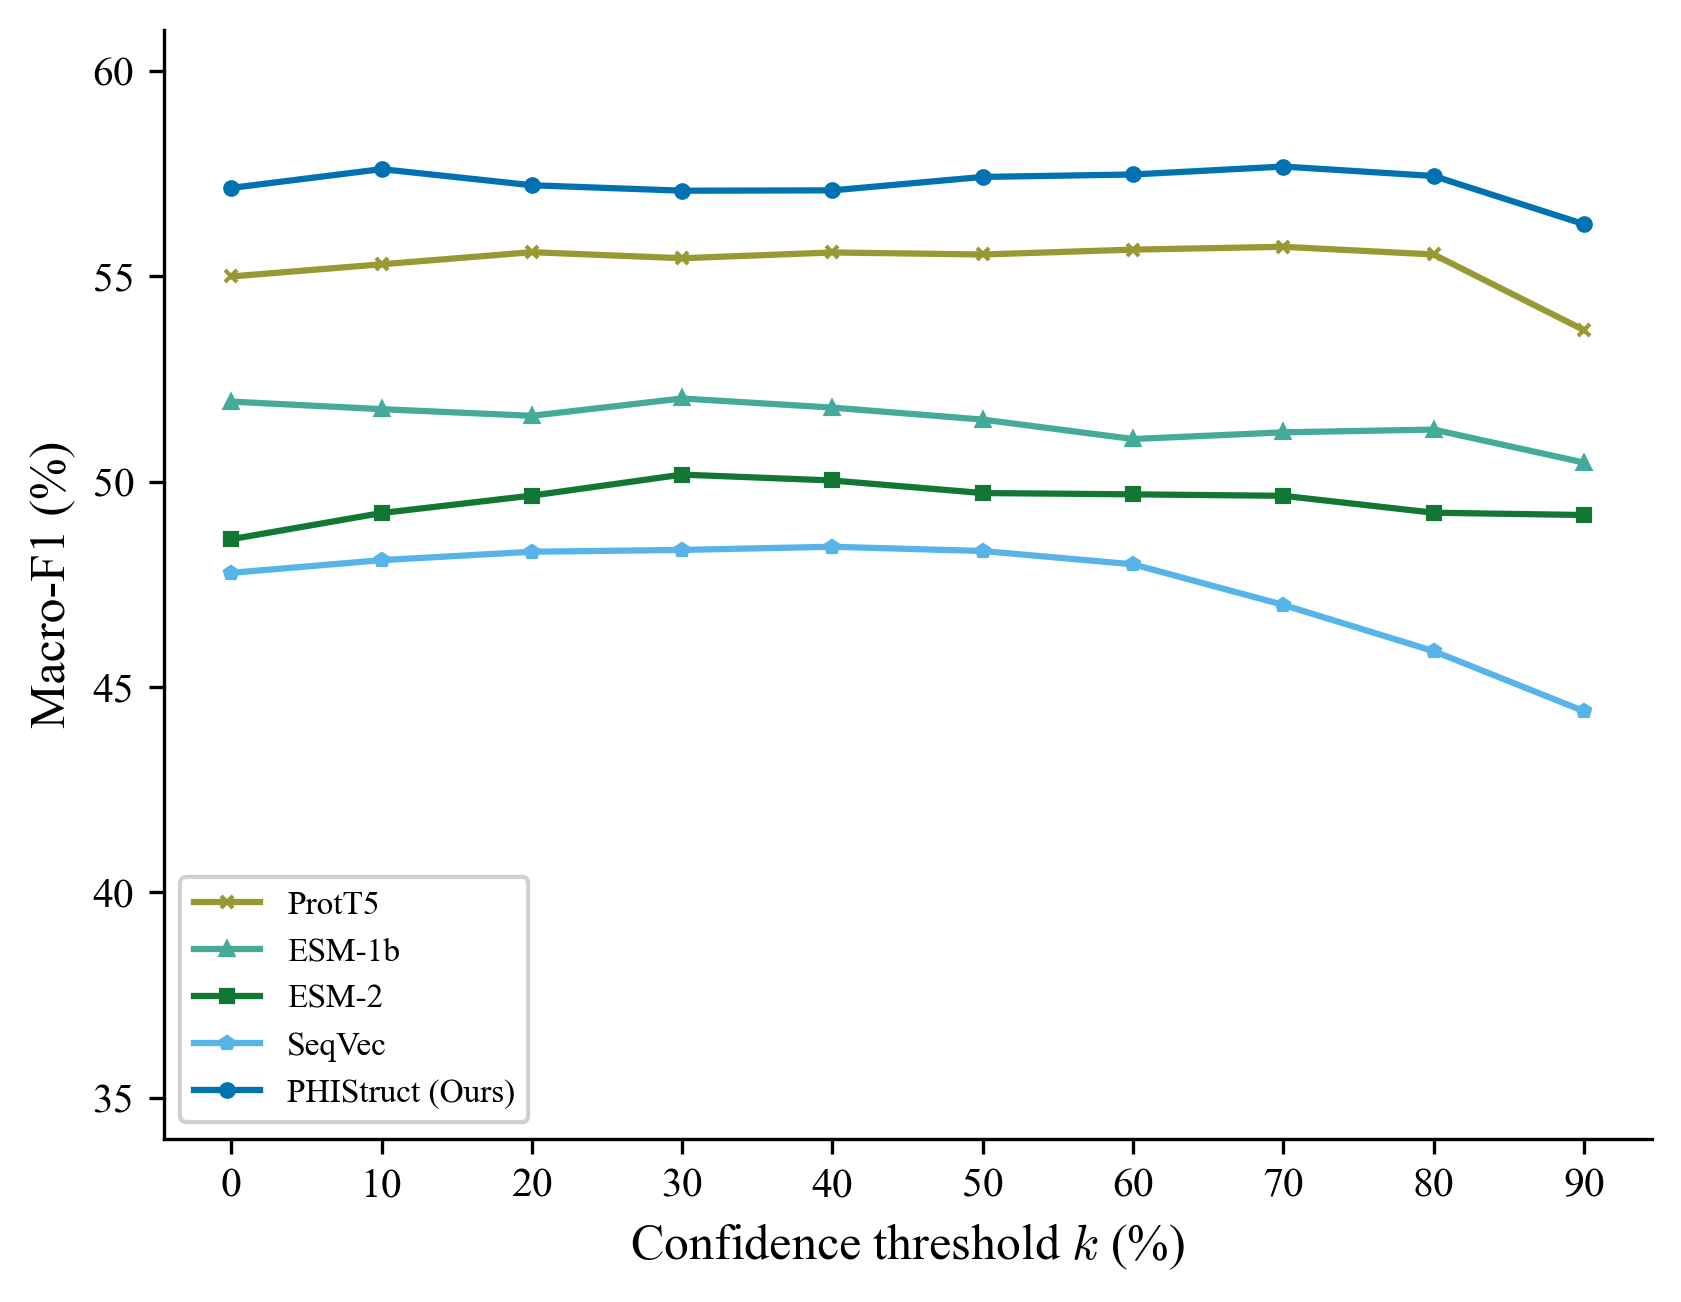

In [23]:
fig, ax = plt.subplots()

(line0,) = ax.plot(
    axis[0],
    results_f1[0],
    color=colors[0],
    label="ProtT5",
    marker=markers[0][0],
    markersize=3,
)
(line1,) = ax.plot(
    axis[1],
    results_f1[1],
    color=colors[1],
    label="ESM-1b",
    marker=markers[1][0],
    markersize=3,
)
(line2,) = ax.plot(
    axis[2],
    results_f1[2],
    color=colors[2],
    label="ESM-2",
    marker=markers[2][0],
    markersize=3,
)
(line3,) = ax.plot(
    axis[3],
    results_f1[3],
    color=colors[3],
    label="SeqVec",
    marker=markers[3][0],
    markersize=3,
)
(line4,) = ax.plot(
    axis[4],
    results_f1[4],
    color=colors[-1],
    label="PHIStruct (Ours)",
    marker=markers[-1][0],
    markersize=3,
)

if SIMILARITY == 40:
    ax.set_ylim(bottom=34, top=61)
elif SIMILARITY == 100:
    ax.set_ylim(bottom=75, top=82)
elif SIMILARITY == 80:
    ax.set_ylim(top=66, bottom=54)
elif SIMILARITY == 60:
    ax.set_ylim(top=65, bottom=47)

ax.set_ylabel("Macro-F1 (%)", fontsize=12)
ax.set_xlabel("Confidence threshold $k$ (%)", fontsize=12)
ax.set_xticks([val for val in axis[0]])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
legend1 = ax.legend(
    loc="lower left",
    handles=[line0, line1, line2, line3, line4],
    title_fontsize=8,
    prop={"size": 8},
)

plt.gca().add_artist(legend1)
plt.savefig(f"../figures/plm-f1-s-{SIMILARITY}.png", bbox_inches="tight")

<hr>

# Part V: Structure-aware protein language models

In [26]:
models = [
    f"prostt5_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"prostt5_3di_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"pst_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
]

model_results = []
for model in models:
    with open(f"{constants.TEMP_RESULTS}/{model}.pickle", "rb") as f:
        model_results.append(pickle.load(f))

results_f1 = []
for model in models:
    result = []
    for threshold in range(0, 11):
        metric = get_macro_no_others(model, threshold, F1) * 100
        result.append(metric)
    results_f1.append(result[:-1])

axis = []
for model in models:
    scale = [threshold * 10 for threshold in range(0, 11)]
    axis.append(scale[:-1])

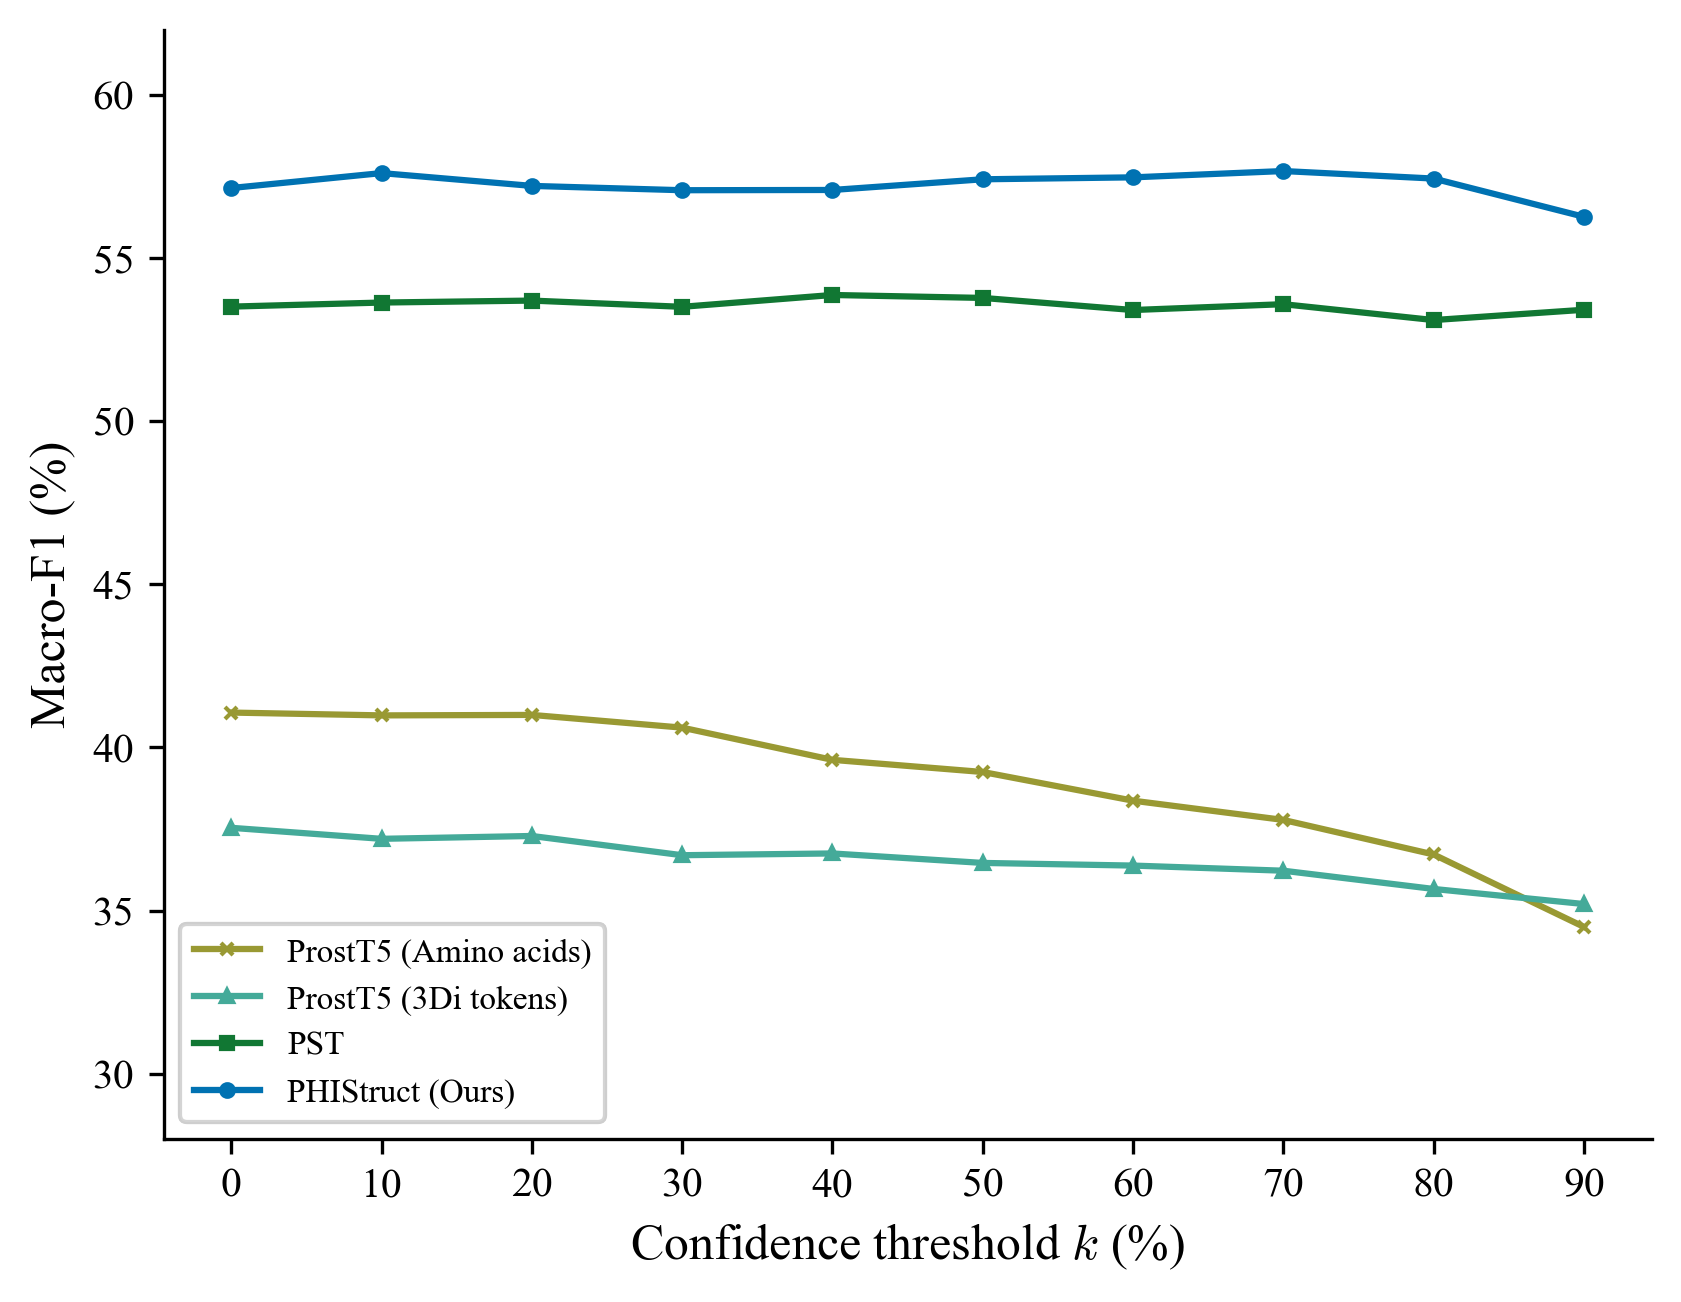

In [27]:
fig, ax = plt.subplots()

(line0,) = ax.plot(
    axis[0],
    results_f1[0],
    color=colors[0],
    label="ProstT5 (Amino acids)",
    marker=markers[0][0],
    markersize=3,
)
(line1,) = ax.plot(
    axis[1],
    results_f1[1],
    color=colors[1],
    label="ProstT5 (3Di tokens)",
    marker=markers[1][0],
    markersize=3,
)
(line2,) = ax.plot(
    axis[2],
    results_f1[2],
    color=colors[2],
    label="PST",
    marker=markers[2][0],
    markersize=3,
)
(line3,) = ax.plot(
    axis[3],
    results_f1[3],
    color=colors[-1],
    label="PHIStruct (Ours)",
    marker=markers[-1][0],
    markersize=3,
)

if SIMILARITY == 40:
    ax.set_ylim(top=62, bottom=28)
elif SIMILARITY == 80:
    ax.set_ylim(bottom=52)
elif SIMILARITY == 60:
    ax.set_ylim(top=66, bottom=41)
elif SIMILARITY == 100:
    ax.set_ylim(top=83)

ax.set_ylabel("Macro-F1 (%)", fontsize=12)
ax.set_xlabel("Confidence threshold $k$ (%)", fontsize=12)
ax.set_xticks([val for val in axis[0]])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
legend1 = ax.legend(
    loc="lower left",
    handles=[line0, line1, line2, line3],
    title_fontsize=8,
    prop={"size": 8},
)

plt.gca().add_artist(legend1)
plt.savefig(f"../figures/struct-f1-s-{SIMILARITY}.png", bbox_inches="tight")

<hr>

# Part VI: Masking Strategies

In [30]:
models = [
    f"saprot_seq_mask_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_struct_mask_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_mask_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
]

model_results = []
for model in models:
    with open(f"{constants.TEMP_RESULTS}/{model}.pickle", "rb") as f:
        model_results.append(pickle.load(f))

results_f1 = []
for model in models:
    result = []
    for threshold in range(0, 11):
        metric = get_macro_no_others(model, threshold, F1) * 100
        result.append(metric)
    results_f1.append(result[:-1])

axis = []
for model in models:
    scale = [threshold * 10 for threshold in range(0, 11)]
    axis.append(scale[:-1])

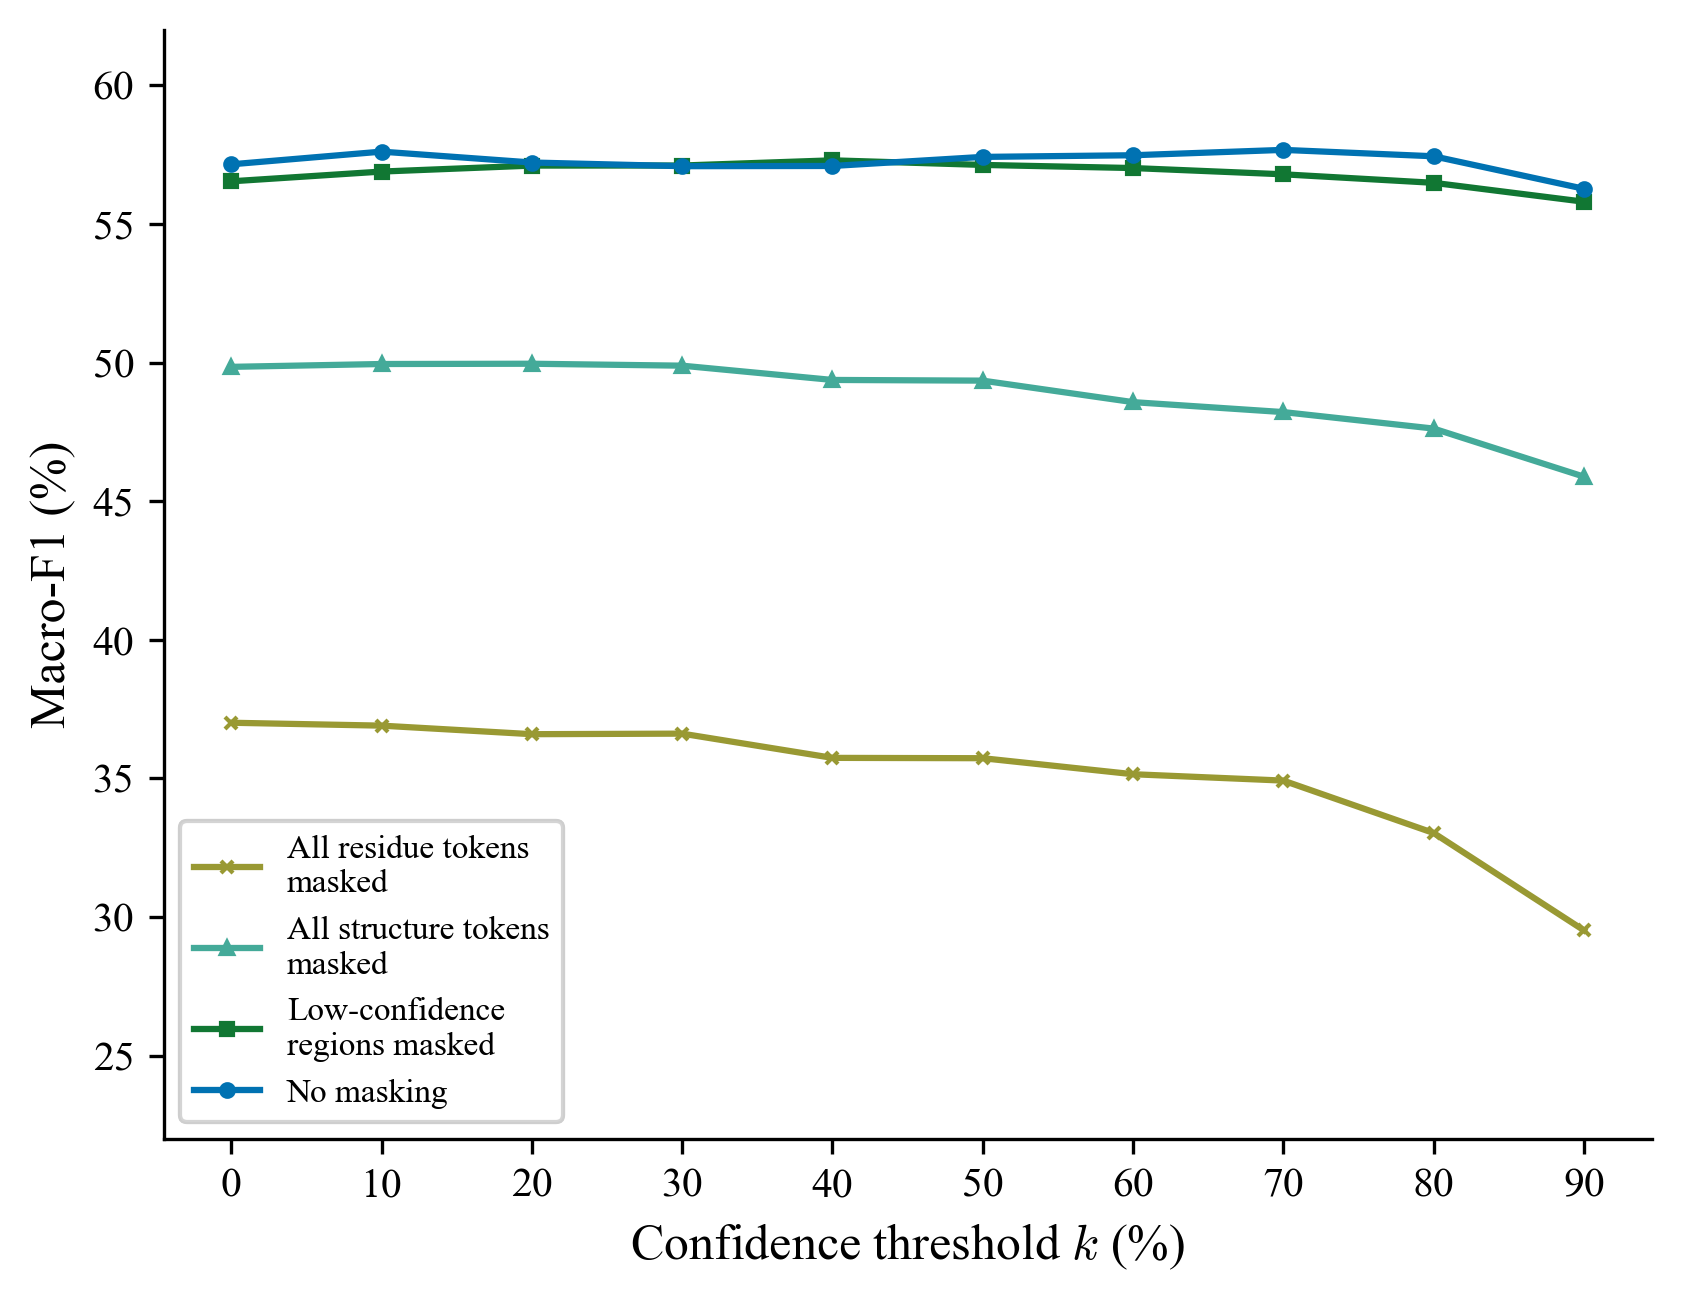

In [31]:
fig, ax = plt.subplots()

(line0,) = ax.plot(
    axis[0],
    results_f1[0],
    color=colors[0],
    label="All residue tokens\nmasked",
    marker=markers[0][0],
    markersize=3,
)
(line1,) = ax.plot(
    axis[1],
    results_f1[1],
    color=colors[1],
    label="All structure tokens\nmasked",
    marker=markers[1][0],
    markersize=3,
)
(line2,) = ax.plot(
    axis[2],
    results_f1[2],
    color=colors[2],
    label="Low-confidence\nregions masked",
    marker=markers[2][0],
    markersize=3,
)
(line3,) = ax.plot(
    axis[3],
    results_f1[3],
    color=colors[-1],
    label="No masking",
    marker=markers[-1][0],
    markersize=3,
)

if SIMILARITY == 40:
    ax.set_ylim(top=62, bottom=22)
elif SIMILARITY == 80:
    ax.set_ylim(top=67)
elif SIMILARITY == 60:
    ax.set_ylim(top=66, bottom=41)

ax.set_ylabel("Macro-F1 (%)", fontsize=12)
ax.set_xlabel("Confidence threshold $k$ (%)", fontsize=12)
ax.set_xticks([val for val in axis[0]])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
legend1 = ax.legend(
    loc="lower left",
    handles=[line0, line1, line2, line3],
    title_fontsize=8,
    prop={"size": 8},
)

plt.gca().add_artist(legend1)
plt.savefig(f"../figures/masking-f1-s-{SIMILARITY}.png", bbox_inches="tight")

<hr>

# Part VII: Downstream Classifiers

In [34]:
models = [
    f"saprot_relaxed_r3-svm-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_relaxed_r3-rf-eskapee-smotetomek-{SIMILARITY}",
    f"saprot_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}",
]

model_results = []
for model in models:
    with open(f"{constants.TEMP_RESULTS}/{model}.pickle", "rb") as f:
        model_results.append(pickle.load(f))

results_f1 = []
for model in models:
    result = []
    for threshold in range(0, 11):
        metric = get_macro_no_others(model, threshold, F1) * 100
        result.append(metric)
    results_f1.append(result[:-1])

axis = []
for model in models:
    scale = [threshold * 10 for threshold in range(0, 11)]
    axis.append(scale[:-1])

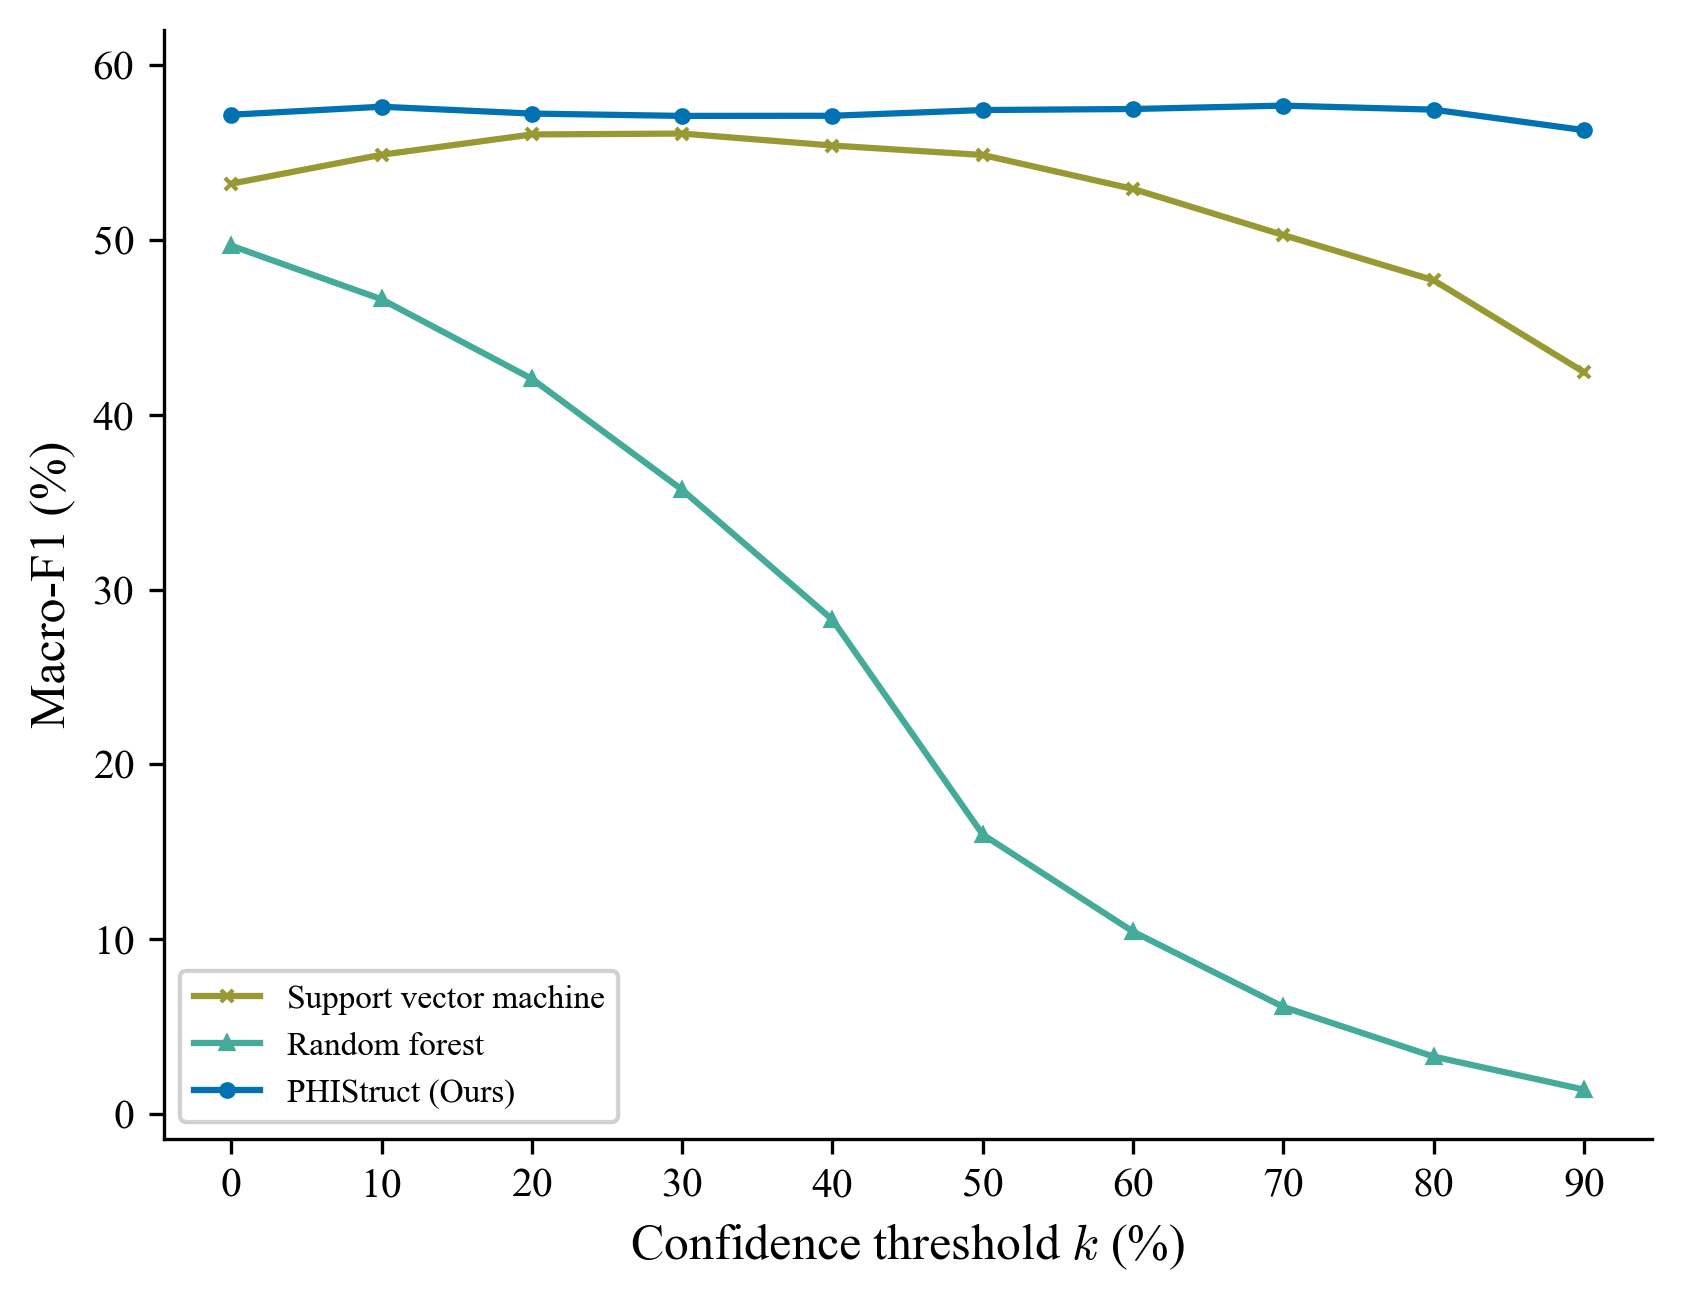

In [35]:
fig, ax = plt.subplots()

(line0,) = ax.plot(
    axis[0],
    results_f1[0],
    color=colors[0],
    label="Support vector machine",
    marker=markers[0][0],
    markersize=3,
)
(line1,) = ax.plot(
    axis[1],
    results_f1[1],
    color=colors[1],
    label="Random forest",
    marker=markers[1][0],
    markersize=3,
)
(line2,) = ax.plot(
    axis[2],
    results_f1[2],
    color=colors[-1],
    label="PHIStruct (Ours)",
    marker=markers[-1][0],
    markersize=3,
)

if SIMILARITY == 40:
    ax.set_ylim(top=62)
elif SIMILARITY == 80:
    ax.set_ylim(top=71)
elif SIMILARITY == 60:
    ax.set_ylim(top=71)
elif SIMILARITY == 100:
    ax.set_ylim(top=91)

ax.set_ylabel("Macro-F1 (%)", fontsize=12)
ax.set_xlabel("Confidence threshold $k$ (%)", fontsize=12)
ax.set_xticks([val for val in axis[0]])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
legend1 = ax.legend(
    loc="lower left",
    handles=[line0, line1, line2],
    title_fontsize=8,
    prop={"size": 8},
)

plt.gca().add_artist(legend1)
plt.savefig(f"../figures/ml-f1-s-{SIMILARITY}.png", bbox_inches="tight")